**Description**

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

**CustomerId:** Unique ID which is assigned to each customer  
**Surname:** Last name of the customer  
**CreditScore:** It defines the credit history of the customer.  
**Geography:** A customer’s location    
**Gender:** It defines the Gender of the customer   
**Age:** Age of the customer     
**Tenure:** Number of years for which the customer has been with the bank   
**NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.  
**Balance:** Account balance  
**HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.  
**EstimatedSalary:** Estimated salary   
**isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )    
**Excited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values                      
                   
                    0=No ( Customer did not leave the bank )    

                    1=Yes ( Customer left the bank )

**Introductory Steps**

**Importing Libraries**

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

**Loading the Data**

In [22]:
Data = pd.read_csv('/content/sample_data/Churn.csv')


In [23]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Data Overview

In [24]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [26]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000 observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.

In [27]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [28]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [29]:
Data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [30]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [31]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [32]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


* Over 54% of the employees in this dataset are males and 50% Geography is France

**Data Pre-processing**

In [33]:
# RowNumber and CustomerId columns consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns=["RowNumber","CustomerId"],  inplace=True)

In [34]:
Data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **EDA**

***Univariate Analysis***

In [35]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [36]:
Data.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

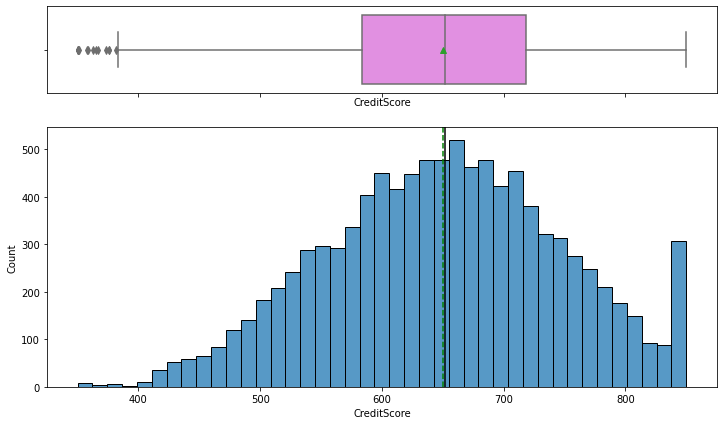

In [37]:
histogram_boxplot(Data, "CreditScore")

Creditscore has some outliers with value less than 400 and the graph normally distributed though some have very  high credit scores.

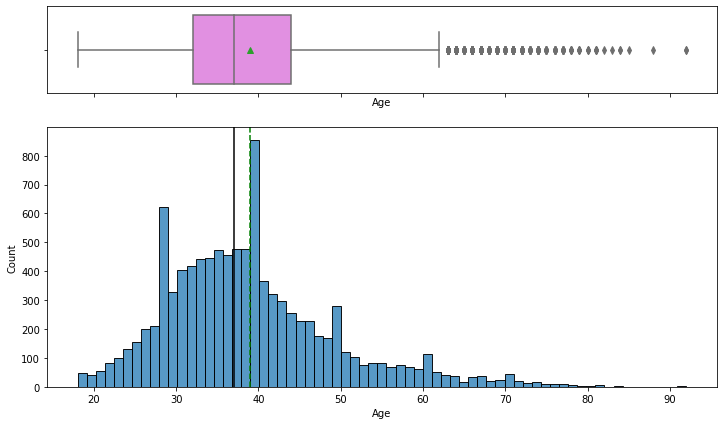

In [38]:
histogram_boxplot(Data, "Age")

75% customers are below 50

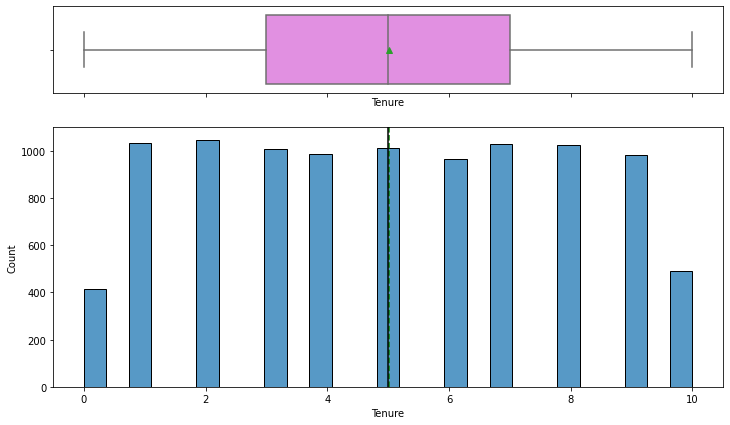

In [39]:
histogram_boxplot(Data, "Tenure")

75% of customeres tenure is 0- 7 years 

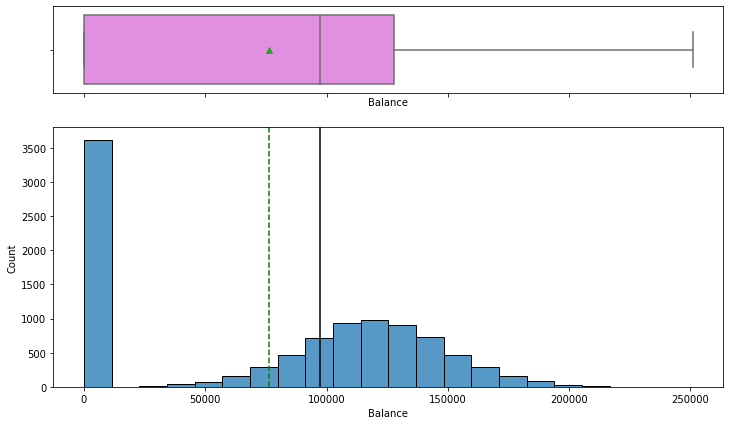

In [40]:
histogram_boxplot(Data, "Balance")

50% of customers account balance is leass than 100000.

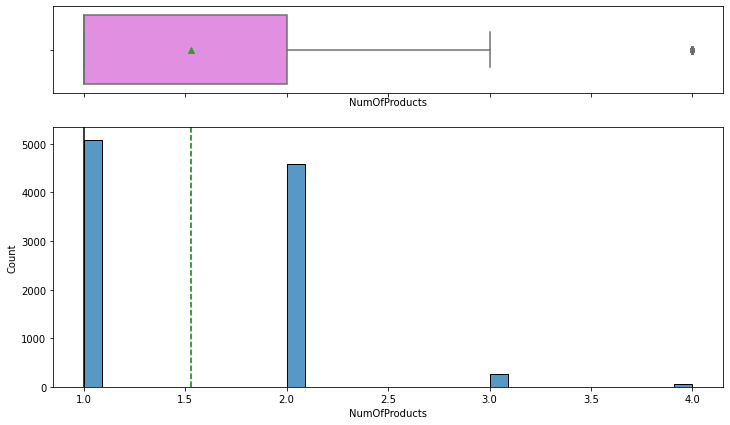

In [41]:
histogram_boxplot(Data, "NumOfProducts")

numofProducts of 75% customers is 1 or 2.

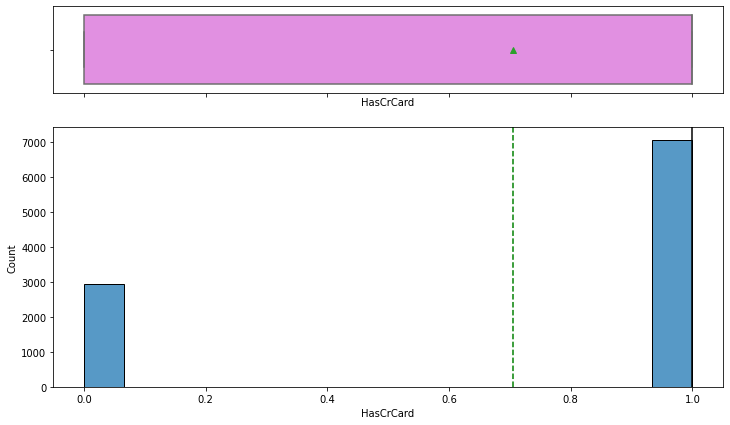

In [42]:
histogram_boxplot(Data, "HasCrCard")

75% customers has credit card

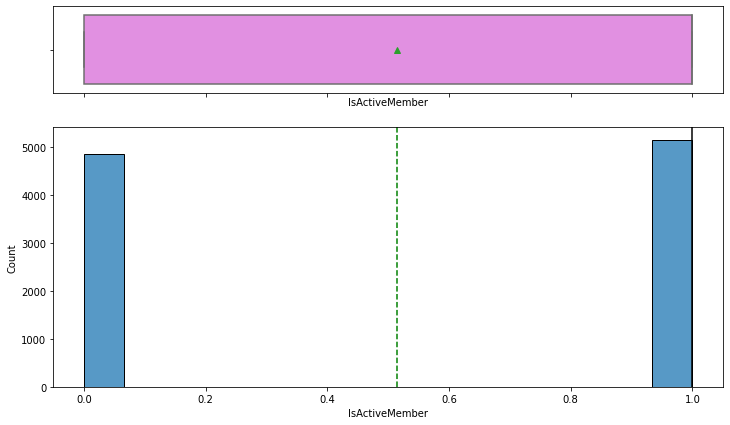

In [43]:
histogram_boxplot(Data, "IsActiveMember")

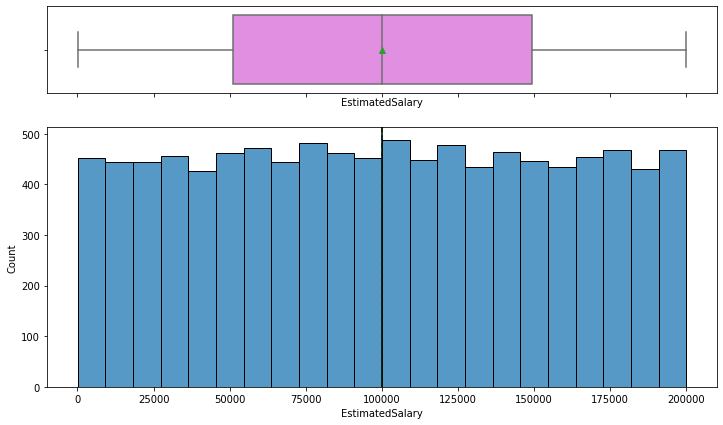

In [44]:
histogram_boxplot(Data, "EstimatedSalary")

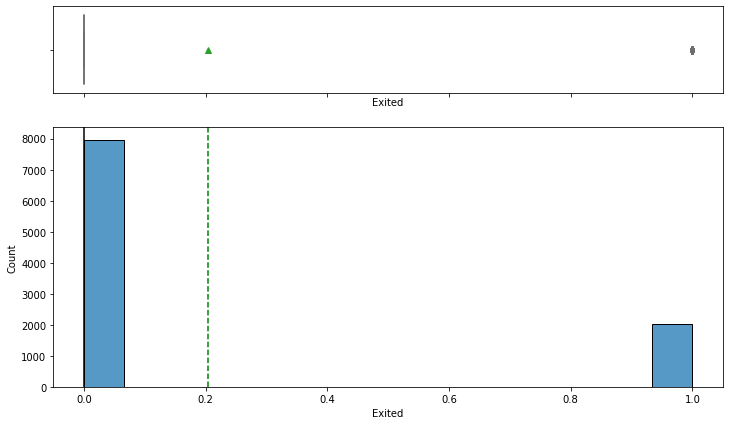

In [45]:
histogram_boxplot(Data, "Exited")

75% not left the bank

In [46]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

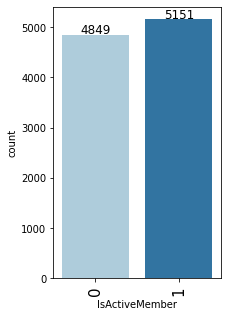

In [47]:
labeled_barplot(Data, "IsActiveMember")

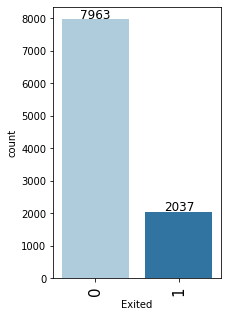

In [48]:
labeled_barplot(Data, "Exited")

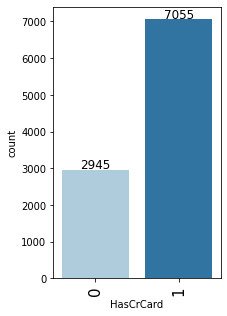

In [49]:
labeled_barplot(Data, "HasCrCard")

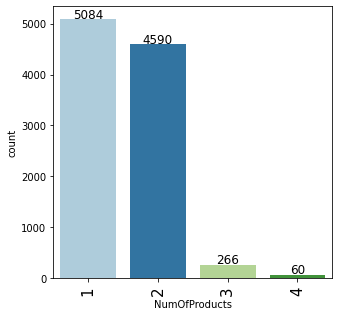

In [50]:
labeled_barplot(Data, "NumOfProducts")

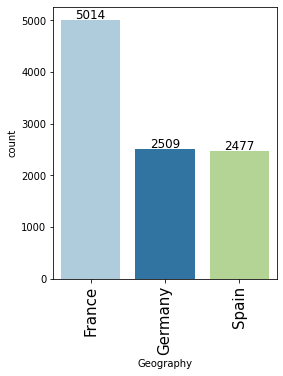

In [51]:
labeled_barplot(Data, "Geography")

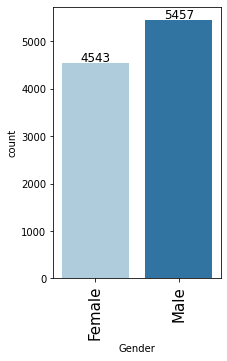

In [52]:
labeled_barplot(Data, "Gender")

**Bivariate Analysis**

In [53]:
### Function to plot distributions


def distribution_plot_wrt_Exited(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Exited for Exited=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of Exited for Exited=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t exited")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t exited")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

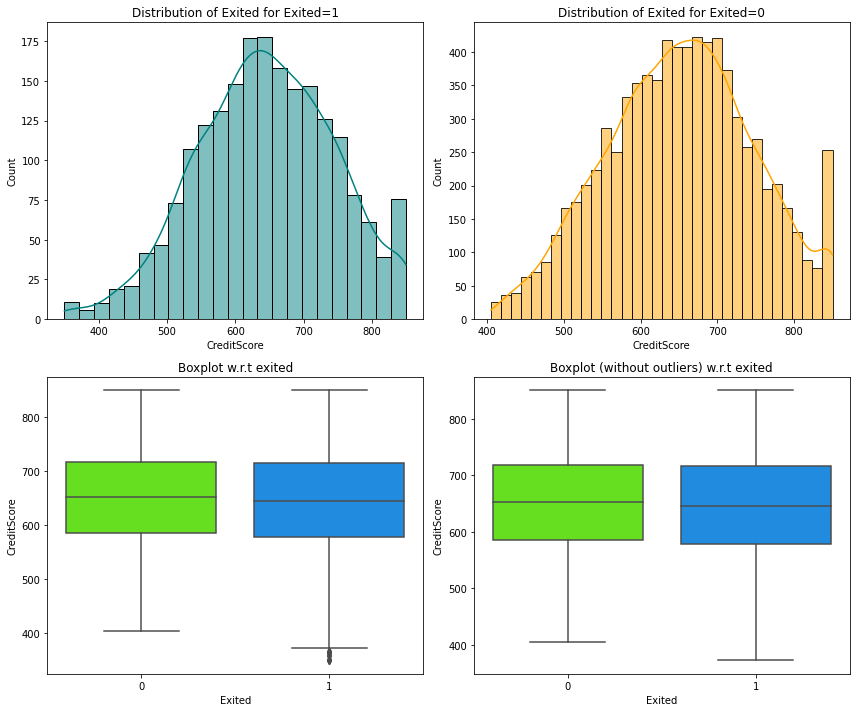

In [42]:
distribution_plot_wrt_Exited(Data, "CreditScore", "Exited")

Median creditscore for both classes is 650.

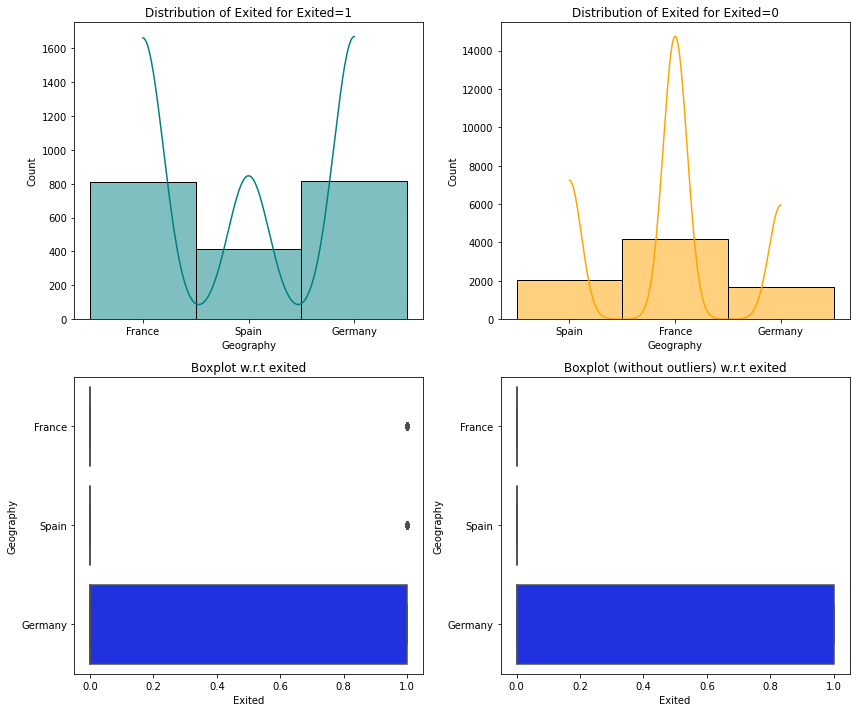

In [43]:
distribution_plot_wrt_Exited(Data, "Geography", "Exited")

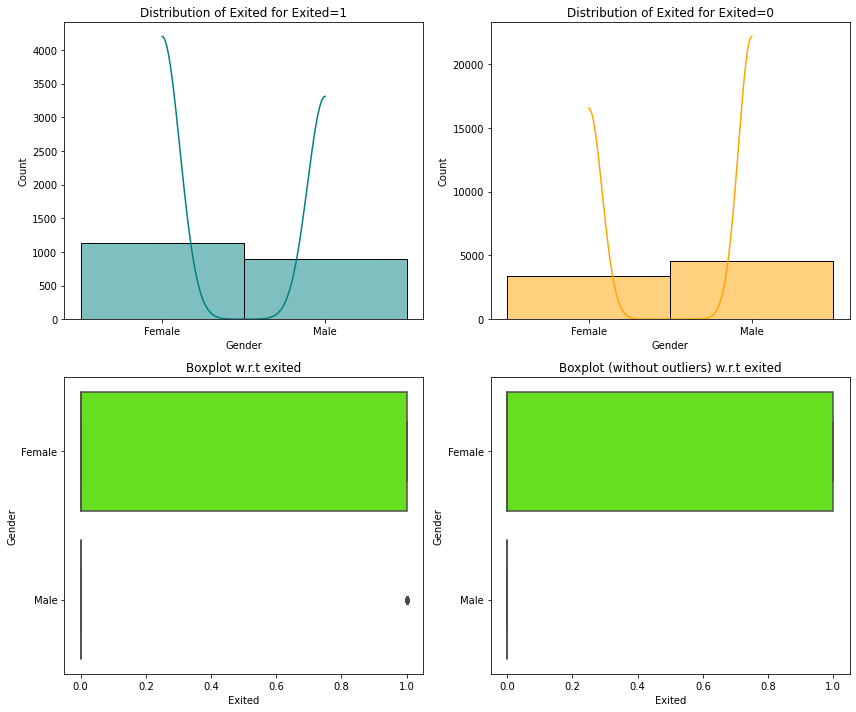

In [44]:
distribution_plot_wrt_Exited(Data, "Gender", "Exited")

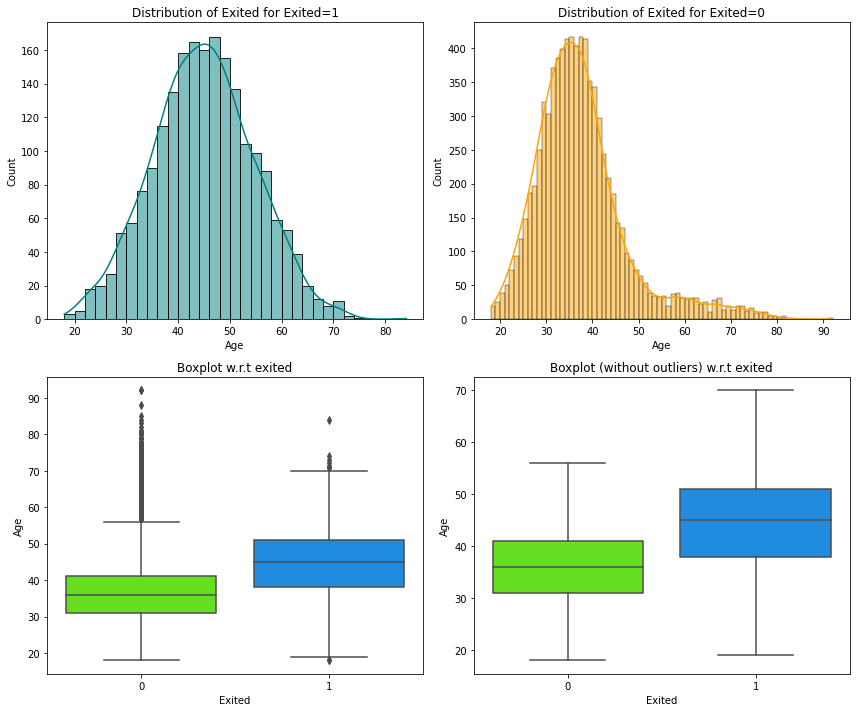

In [45]:
distribution_plot_wrt_Exited(Data, "Age", "Exited")

40-50 age range leaving bank more  and 30 -40 are not leaving that much.

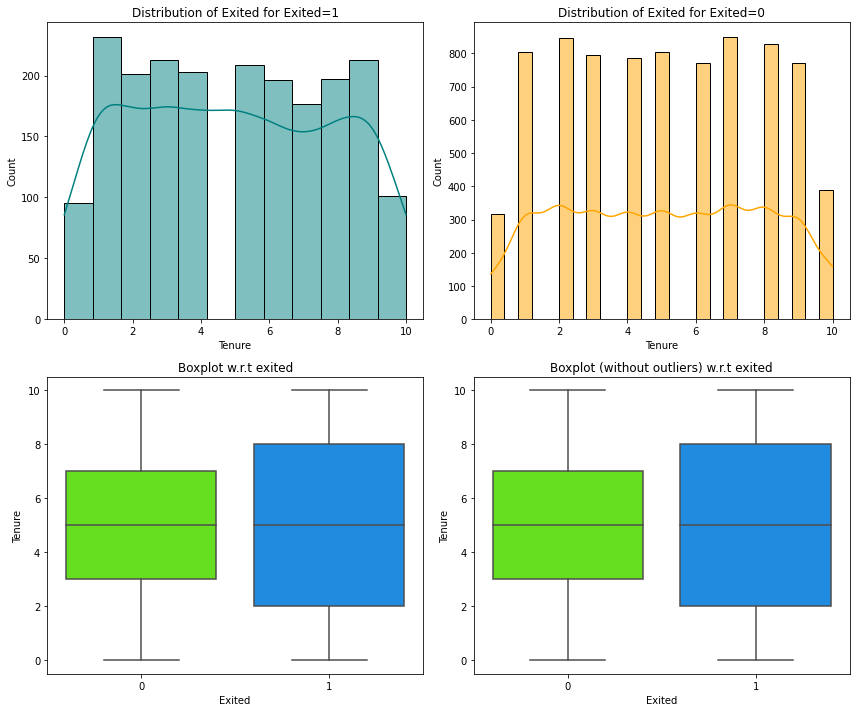

In [46]:
distribution_plot_wrt_Exited(Data, "Tenure", "Exited")

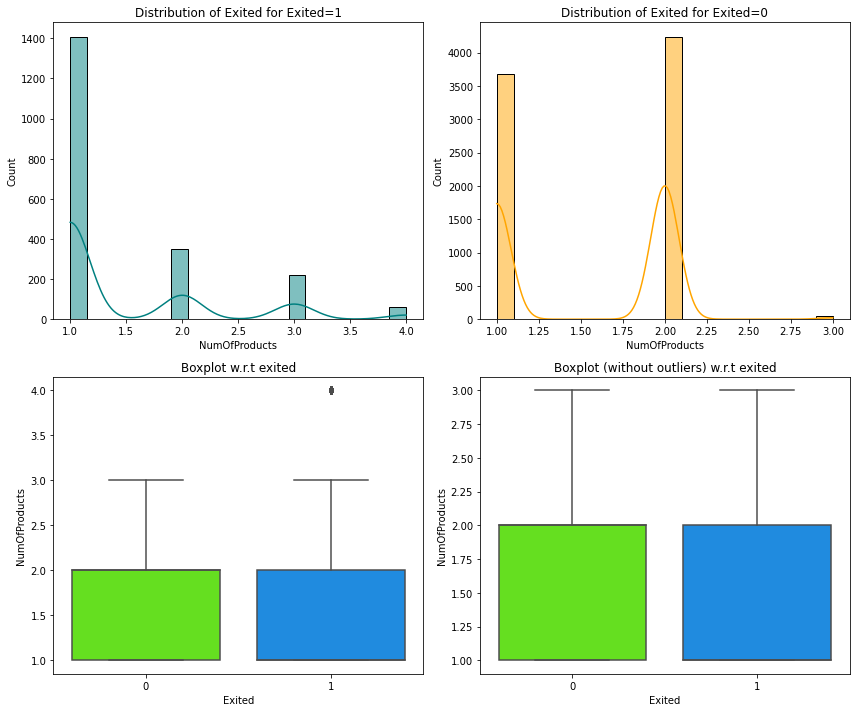

In [47]:
distribution_plot_wrt_Exited(Data, "NumOfProducts", "Exited")

Both class look similar

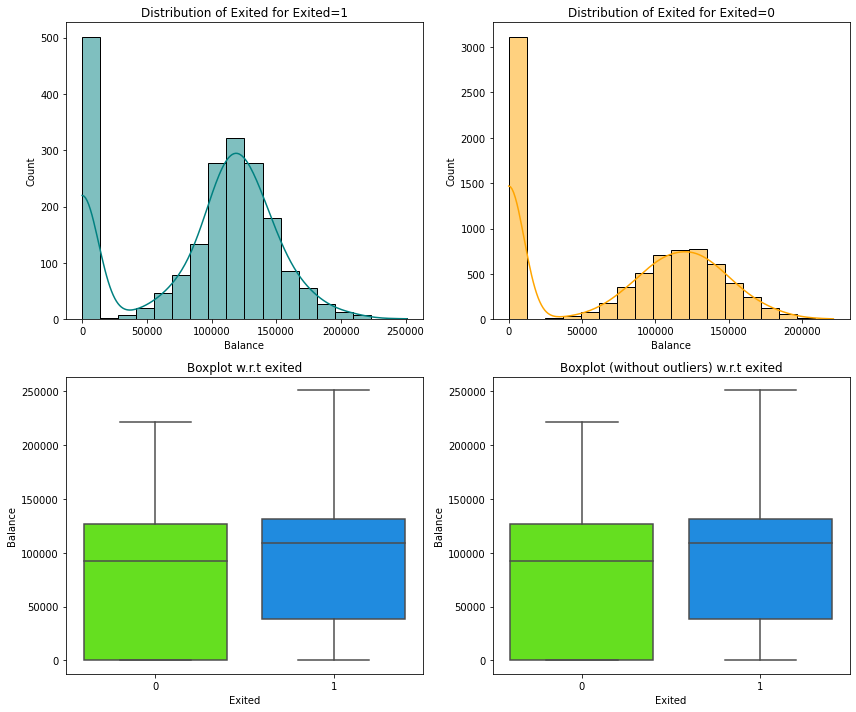

In [48]:
distribution_plot_wrt_Exited(Data, "Balance", "Exited")

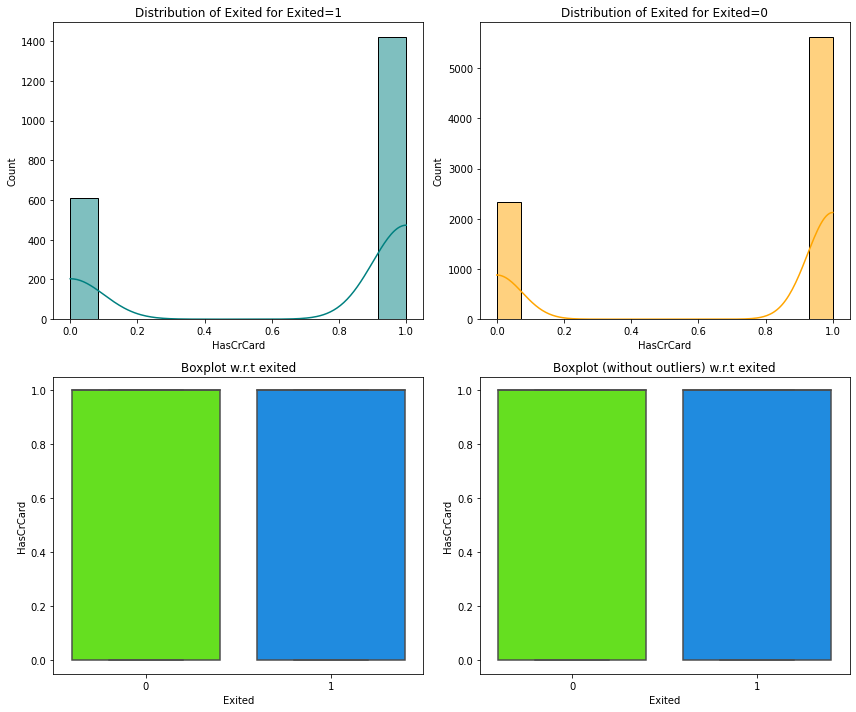

In [49]:
distribution_plot_wrt_Exited(Data, "HasCrCard", "Exited")

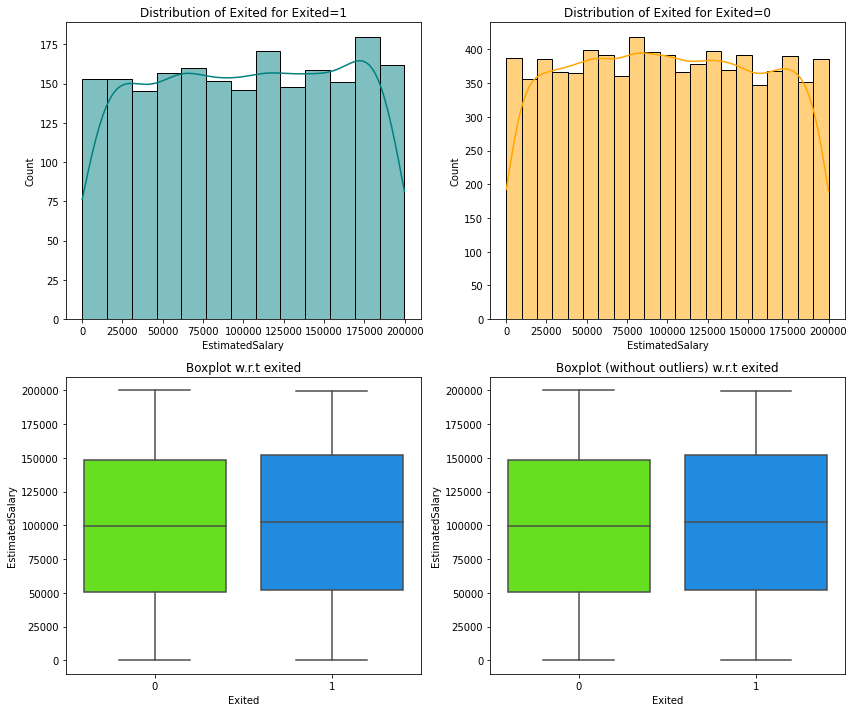

In [50]:
distribution_plot_wrt_Exited(Data, "EstimatedSalary", "Exited")

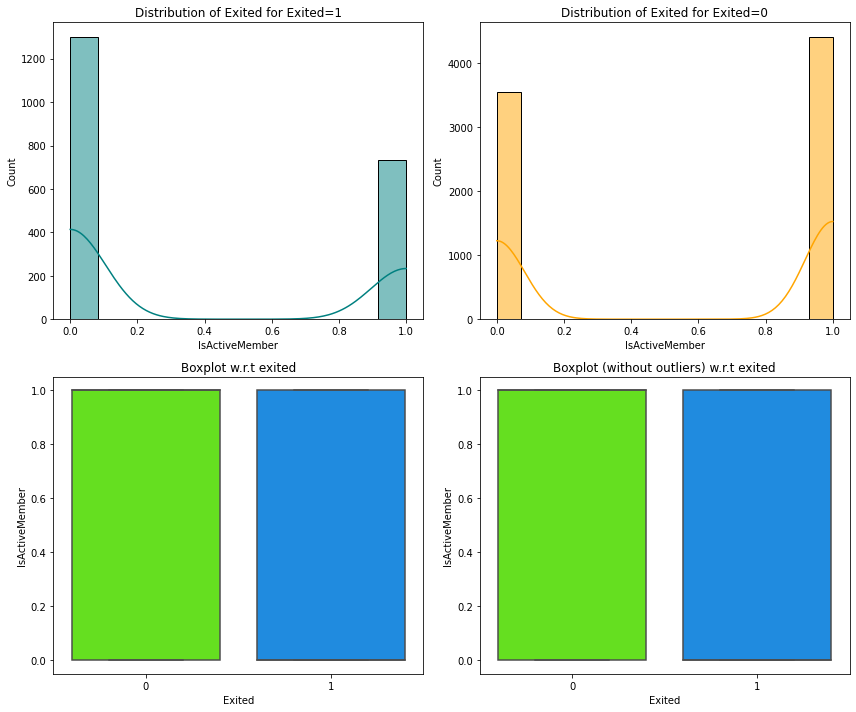

In [51]:
distribution_plot_wrt_Exited(Data, "IsActiveMember", "Exited")

In [52]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


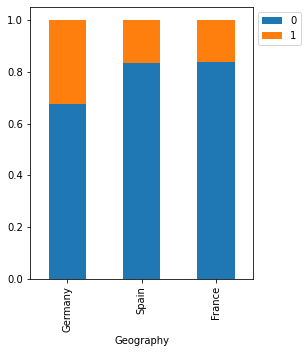

In [53]:
stacked_barplot(Data, "Geography", "Exited")

Germany is exited highest in number

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


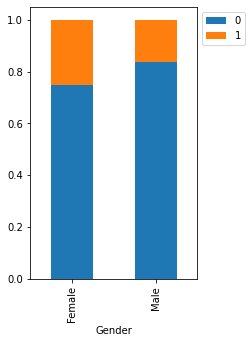

In [54]:
stacked_barplot(Data, "Gender", "Exited")

Females exited highest in number

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


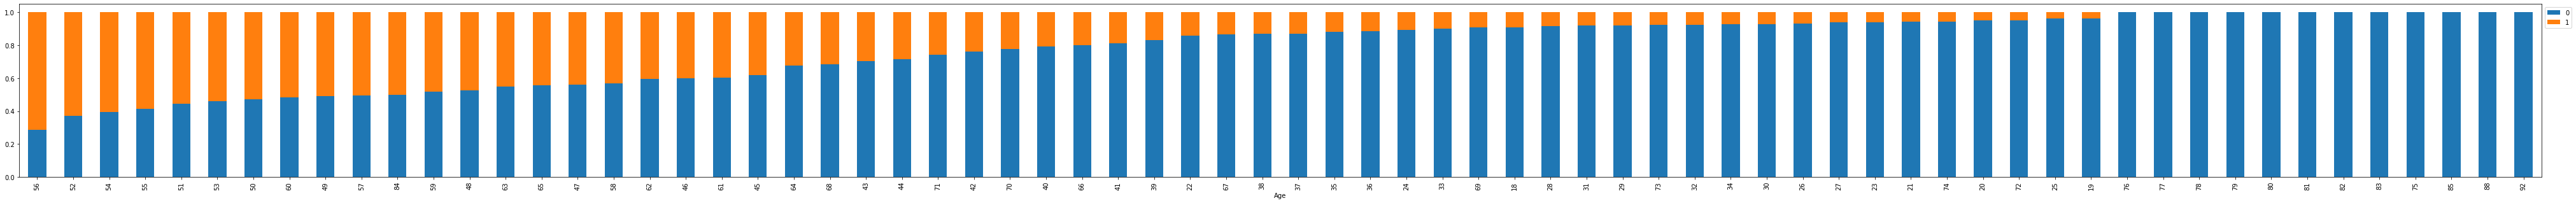

In [55]:
stacked_barplot(Data, "Age", "Exited")

When age increasing not leaving the bank

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


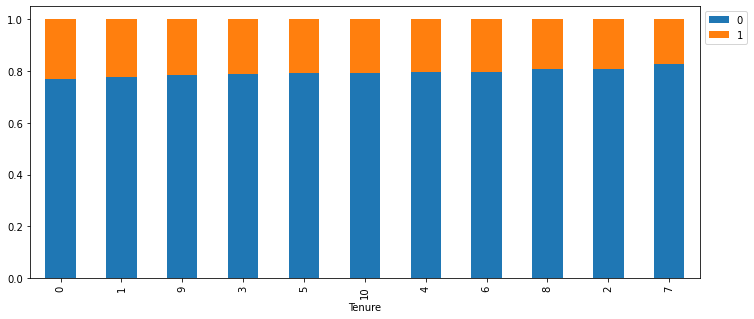

In [56]:
stacked_barplot(Data, "Tenure", "Exited")

Tenure is not a determining attribute on customer leaving the bank.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


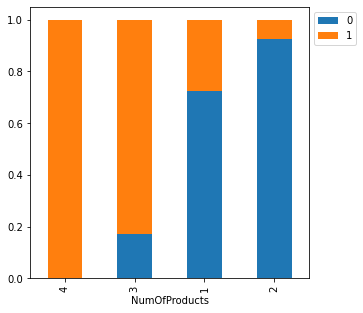

In [57]:
stacked_barplot(Data, "NumOfProducts", "Exited")

When increasing number of products like 3 or 4,then more customers leaving

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


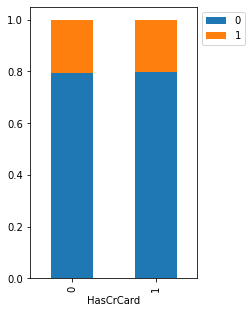

In [58]:
stacked_barplot(Data, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


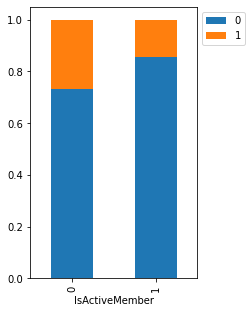

In [59]:
stacked_barplot(Data, "IsActiveMember", "Exited")

customers who are not that active are leaving more compared to active customers.

In [54]:
###Dropping these columns as they will not add value to the modeling
Data.drop(['Surname','Tenure'], axis=1, inplace=True)

In [55]:
## Separating all the categorical columns for imputation
cat_col_df = Data.drop(['Geography','Gender','Exited'], axis=1)

In [56]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data[['Exited']]

In [57]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [58]:
X.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,0.00,1,1,1,101348.88
1,608,Spain,Female,41,83807.86,1,0,1,112542.58
2,502,France,Female,42,159660.80,3,1,0,113931.57
3,699,France,Female,39,0.00,2,0,0,93826.63
4,850,Spain,Female,43,125510.82,1,1,1,79084.10


In [59]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [60]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

****

### Encoding Categorical Columns

We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder_GY = LabelEncoder()
X_train['Geography']= labelencoder_GY.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_GY.transform(X_test['Geography'])

In [62]:
labelencoder_GR = LabelEncoder()
X_train['Gender'] =  labelencoder_GR.fit_transform(X_train['Gender'])
X_test['Gender'] =  labelencoder_GR.transform(X_test['Gender'])

In [63]:
X_train.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,0,1,57,0.00,1,1,0,159475.08
8392,739,1,1,32,102128.27,1,1,0,63981.37
5006,755,1,0,37,113865.23,2,1,1,117396.25
4117,561,0,1,37,0.00,2,1,0,83093.25
7182,692,1,1,49,110540.43,2,0,1,107472.99


In [64]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


In [65]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000, 1)
(2000, 1)


**Model Building**

A model can make wrong predictions in the following ways:

* Predicting a customer left the bank, when he/she is not left the bank.
* Predicting an customer is not left the bank, when he/she is in fact left the bank.

**Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a customer (by wrongly classifying them as likely to left) might lead to decreased productivity, and the bank might lose a good customer affecting the bank's growth. However, giving chances to a non-deserving customer (as they are likely to left) would lead to a financial loss for the bank, and giving such customers an increased priority services might again affect the banks's growth.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the bank would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.

### Model 1

In [66]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [67]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 9, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [74]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [76]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 154201214395875328.0000 - accuracy: 0.7850 - val_loss: 0.5813 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7953 - val_loss: 0.5367 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7953 - val_loss: 0.5179 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7953 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7953 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7953 - val_loss: 0.5029 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7953 - val_loss: 0.5019 - val_accura

63/63 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7965


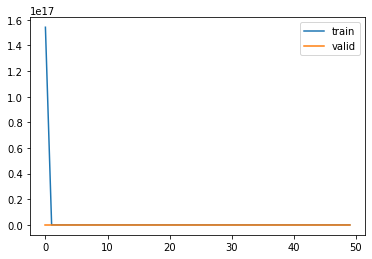

In [77]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [78]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [79]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

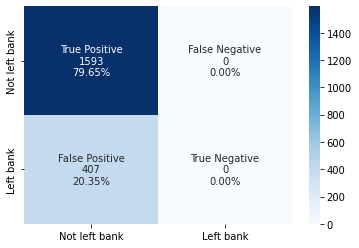

In [80]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left bank','Left bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 0.00% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.

In [81]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



As you can see, the above model has a good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower.

1) **Imbalanced dataset:** As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold:** Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.

Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [82]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [83]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [84]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [85]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 2598.0139 - accuracy: 0.6780 - val_loss: 1086.2699 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 865.1888 - accuracy: 0.6611 - val_loss: 638.4316 - val_accuracy: 0.4206
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 690.7431 - accuracy: 0.6723 - val_loss: 260.8460 - val_accuracy: 0.6363
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 436.1444 - accuracy: 0.6747 - val_loss: 374.4417 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 458.7647 - accuracy: 0.6777 - val_loss: 654.5785 - val_accuracy: 0.4013
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 513.0085 - accuracy: 0.6731 - val_loss: 400.5435 - val_accuracy: 0.4681
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 307.9101 - accuracy: 0.6748 - val_loss: 82.6718 

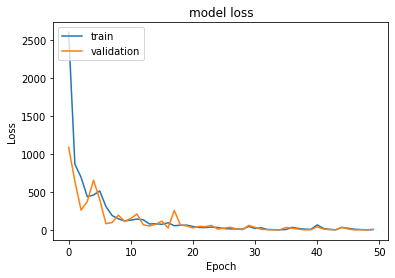

In [86]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for both train and validation.

Best Threshold=0.000000, G-Mean=0.543


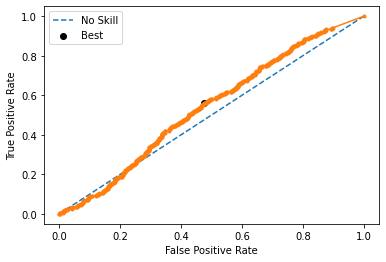

In [87]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(),

and select the threshold with the **largest G-Mean value**.

In [88]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

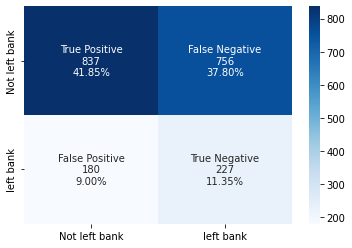

In [89]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not left bank','left bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [90]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.53      0.64      1593
           1       0.23      0.56      0.33       407

    accuracy                           0.53      2000
   macro avg       0.53      0.54      0.48      2000
weighted avg       0.70      0.53      0.58      2000



As the number of layers in the neural network has increased, we can see that the macro F1 score has decreased, and the False Negative percentage has increased.

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score.

### Model 3

In [91]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [93]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [94]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [95]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [96]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5228 - accuracy: 0.7806 - val_loss: 0.5373 - val_accuracy: 0.7538
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7947 - val_loss: 0.5184 - val_accuracy: 0.8012
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7942 - val_loss: 0.5106 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7953 - val_loss: 0.5149 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7952 - val_loss: 0.5019 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7952 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7955 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 

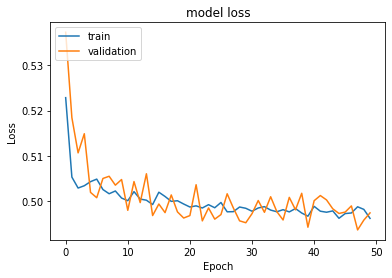

In [97]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a lot of noise in the model, and it and seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.154430, G-Mean=0.545


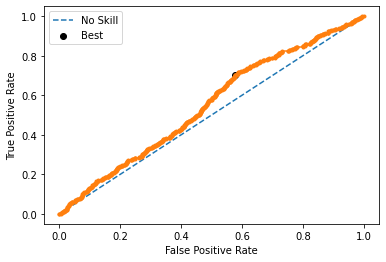

In [98]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

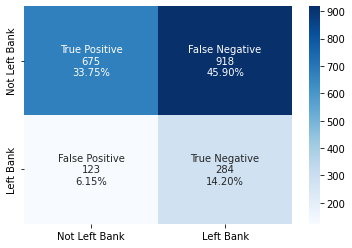

In [100]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Left Bank','Left Bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [101]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.42      0.56      1593
           1       0.24      0.70      0.35       407

    accuracy                           0.48      2000
   macro avg       0.54      0.56      0.46      2000
weighted avg       0.72      0.48      0.52      2000



The Train and Validation curves seem to show overfitting despite having a good F1 score 

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.

### Model 4

In [102]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [103]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [104]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [105]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [106]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 442.9888 - accuracy: 0.6595 - val_loss: 36.8323 - val_accuracy: 0.5600
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 57.5682 - accuracy: 0.6909 - val_loss: 0.6321 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 11.2566 - accuracy: 0.7514 - val_loss: 0.5488 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 4.7744 - accuracy: 0.7753 - val_loss: 0.5167 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 2.7014 - accuracy: 0.7822 - val_loss: 0.5055 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 2.0403 - accuracy: 0.7881 - val_loss: 0.5019 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 1.5701 - accuracy: 0.7905 - val_loss: 0.5009 - val_accuracy: 0.8000
E

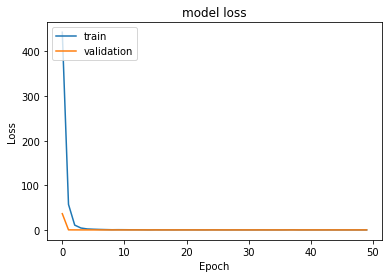

In [107]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both the curves train and validation are smooth.

Best Threshold=0.201956, G-Mean=0.035


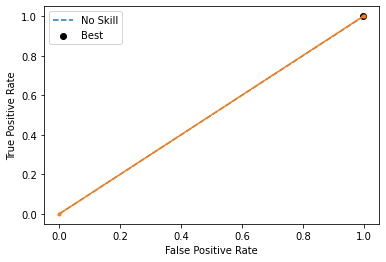

In [108]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [109]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

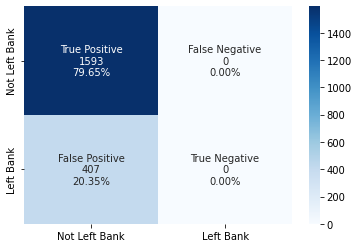

In [110]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Left Bank','Left Bank']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [111]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score also seems to be fine, with a decrease in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [68]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [69]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.

In [70]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [71]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 282.5778 - accuracy: 0.6798 - val_loss: 1.5541 - val_accuracy: 0.8000
Best: 0.796250 using {'lr': 0.01, 'batch_size': 32}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 32, 'learning_rate": 0.1}

Let's create the final model with the above mentioned configuration

In [116]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [117]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 374.8962 - accuracy: 0.6864 - val_loss: 0.6437 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 2.6946 - accuracy: 0.7578 - val_loss: 0.5027 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 1.4348 - accuracy: 0.7775 - val_loss: 0.5008 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 1.2151 - accuracy: 0.7803 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.8691 - accuracy: 0.7887 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.9001 - accuracy: 0.7845 - val_loss: 0.5016 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.7883 - val_loss: 0.5000 - val_accuracy: 0.8006
Epoc

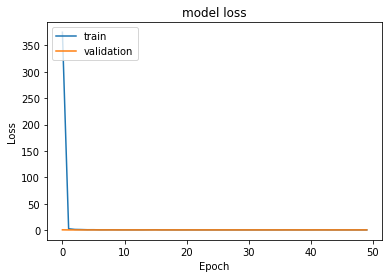

In [118]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the training behavior of the model.

Best Threshold=1.182068, G-Mean=0.000


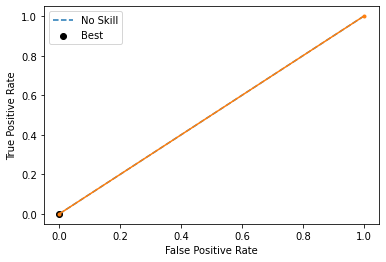

In [119]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [120]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

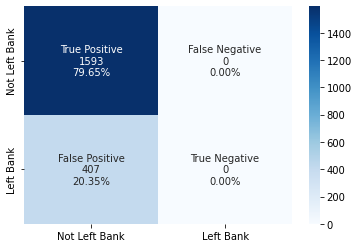

In [121]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Left Bank','Left Bank']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [122]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time.

Other hyperparameters can also be tuned to get better performance on the metrics.

Here, the F1 score of the model has not changed in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration.

Let's use the more exhaustive Grid Search CV and see if the F1 score increases.

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [72]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [73]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [74]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [126]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 5ms/step - loss: 14869.8359 - accuracy: 0.7856 - val_loss: 0.5007 - val_accuracy: 0.8000
Best: 0.796250 using {'batch_size': 64, 'lr': 0.1}
Total runtime of the program is 38.528937101364136


The best model has the following configuration: 

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 32, 'learning_rate": 0.1}

Let's create the final model with the above mentioned configuration

In [127]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [128]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 5099.3818 - accuracy: 0.7539 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 4.0049 - accuracy: 0.7939 - val_loss: 1.5074 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 3.1689 - accuracy: 0.7952 - val_loss: 0.5016 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.7953 - val_loss: 0.5021 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5088 - accuracy: 0.7953 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.7953 - val_loss: 0.5013 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5087 - accuracy: 0.7953 - val_loss: 0.5008 - val_accuracy: 0.8000
Epo

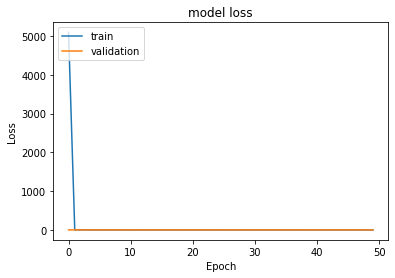

In [129]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, are smooth.

Best Threshold=0.206255, G-Mean=0.056


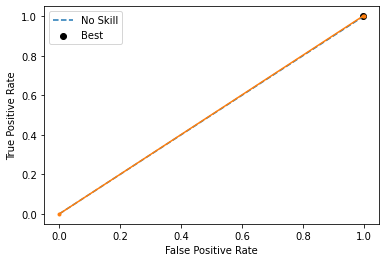

In [130]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [131]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

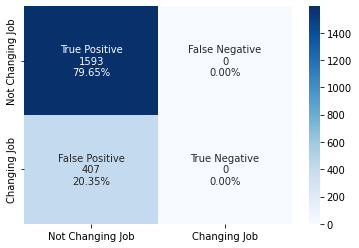

In [132]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [133]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the F1 score of the model, while better than in Randomized Search, is slightly lower than in Model 4 (the Dropout model).

### Dask

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure. 
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn. 

In [3]:
# Try below code to install dask in Google Colab
!pip install dask-ml 

In [5]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

* Dask is the same as regular Grid Search in its functioning. 
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [15]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [17]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [75]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

100/100 [==============================] - 1s 5ms/step - loss: 380.8871 - accuracy: 0.7092 - val_loss: 0.6111 - val_accuracy: 0.8000
Best: 0.796250 using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 47.22666049003601


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We can also use another optimization technique - Keras Tuner.

In [78]:
## Install Keras Tuner
!pip install keras-tuner 

     |████████████████████████████████| 133 kB 6.9 MB/s 


### Keras Tuner

In [79]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [80]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [81]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [82]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [83]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.7960416674613953

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 00h 02m 24s
INFO:tensorflow:Oracle triggered exit


In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.800000011920929
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.79666668176651
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7960416674613953
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7904166777928671
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_

### Model 7

* Let's create a model with the above mentioned best configuration given by 

1.   List item
2.   List item

Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,345
Trainable params: 121,345
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 2090.4868 - accuracy: 0.6673 - val_loss: 805.9722 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 672.5742 - accuracy: 0.6802 - val_loss: 829.1332 - val_accuracy: 0.5450
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 334.1292 - accuracy: 0.6819 - val_loss: 187.8841 - val_accuracy: 0.7881
Epoch 4/50
100/100 [==============================] - 1s 10ms/step - loss: 249.9041 - accuracy: 0.6745 - val_loss: 138.9608 - val_accuracy: 0.5531
Epoch 5/50
100/100 [==============================] - 1s 10ms/step - loss: 210.1921 - accuracy: 0.6800 - val_loss: 188.9292 - val_accuracy: 0.7644
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 161.1792 - accuracy: 0.6845 - val_loss: 80.6734 - val_accuracy: 0.7900
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 148.2555 - accuracy: 0.6830 - val_loss: 164.8698

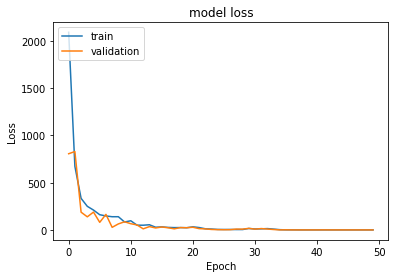

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves are smooth.

Best Threshold=0.235565, G-Mean=0.533


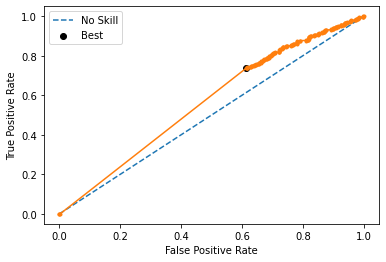

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

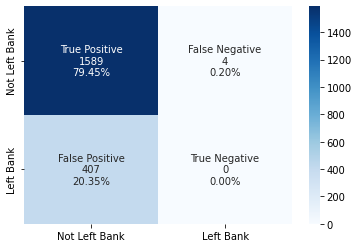

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Left Bank','Left Bank']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.71      2000



* After using the suggested hyperparameters from Keras Tuner, the F1 score has not changed much, and the False Negative rate is higher in comparison to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score. 

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [ ]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [ ]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 01m 06s]
val_accuracy: 0.6903453667958578

Best val_accuracy So Far: 0.942176878452301
Total elapsed time: 00h 03m 59s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.942176878452301
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7859759330749512
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7339089512825012
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.6903453667958578
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
u

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,345
Trainable params: 121,345
Non-trai

In [ ]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 2s 6ms/step - loss: 2075.7104 - accuracy: 0.5471 - val_loss: 0.1619 - val_accuracy: 0.9894
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 477.4284 - accuracy: 0.5459 - val_loss: 73.8934 - val_accuracy: 0.6593
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 250.9281 - accuracy: 0.5445 - val_loss: 378.9491 - val_accuracy: 0.1766
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 119.4746 - accuracy: 0.5490 - val_loss: 3.6219e-07 - val_accuracy: 1.0000
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 104.1123 - accuracy: 0.5488 - val_loss: 76.0052 - val_accuracy: 0.3359
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 69.6066 - accuracy: 0.5463 - val_loss: 169.5736 - val_accuracy: 0.0801
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 49.7473 - accuracy: 0.5462 - val_loss: 18.2472 - val

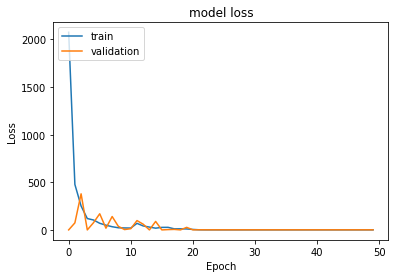

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

Best Threshold=0.373824, G-Mean=0.188


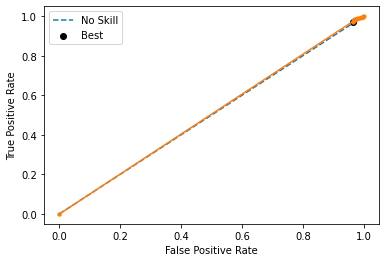

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

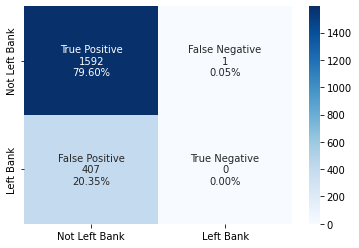

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Left Bank','Left Bank']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



After applying the SMOTE technique to the data, the F1 score increased, and the False Negative rate decreased, but if you see the loss curves of train and validation, the model seems to have overfit.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 282.5778 - accuracy: 0.6798 - val_loss: 1.5541 - val_accuracy: 0.8000


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796250 using {'batch_size': 32, 'lr': 0.01}


In [ ]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 2s 4ms/step - loss: 163.6705 - accuracy: 0.5739 - val_loss: 0.9416 - val_accuracy: 0.0000e+00
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 1.5547 - accuracy: 0.6044 - val_loss: 1.0202 - val_accuracy: 0.0000e+00
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.8114 - accuracy: 0.6210 - val_loss: 0.9414 - val_accuracy: 0.0000e+00
Epoch 4/50
319/319 [==============================] - 1s 4ms/step - loss: 0.8027 - accuracy: 0.6230 - val_loss: 1.0785 - val_accuracy: 0.0000e+00
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.7038 - accuracy: 0.6248 - val_loss: 1.0453 - val_accuracy: 0.0000e+00
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6887 - accuracy: 0.6247 - val_loss: 0.9339 - val_accuracy: 0.0000e+00
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6738 - accuracy: 0.6248 - val_loss: 0.9834 - v

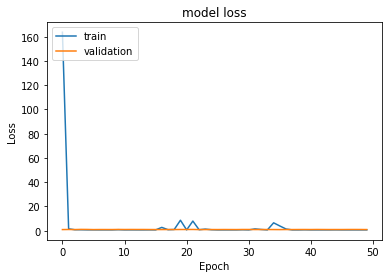

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model. 

Grid Search CV also does not seem to work that well on the SMOTE data.

Best Threshold=1.382971, G-Mean=0.000


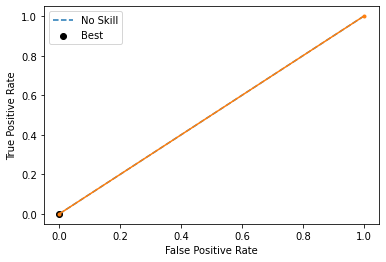

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

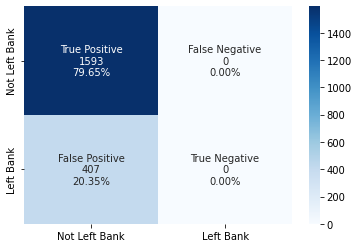

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Left Bank','Left Bank']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Oversampling using SMOTE did not help improve the F1 score. 

In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

 **Model 1**  , **Model 4** and  **Model 6** give similar result.

So, our final model here can be **Model 1**  or  **Model 4**   which uses the Dropout regularization technique or **model6**.

### Suggested Areas of Improvement

* Build any one Machine Learning model, and use that to get the feature importance of the variables. Try to use that in the neural network model.

* You can try to do better feature engineerning by removing the flaws of the skewed variables if required.

### Business Recommendations

* The HR department of the bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether a customer is likely to switch bank or not, and this process seems to be easier and more time-efficient than other methods.

The optimised model gives better results as seen from the confusion matrix as well as an improved F1 score.




In [4]:

%%shell
jupyter nbconvert --to html /content/sample_data/BankChurnPrediction.ipynb

[NbConvertApp] Converting notebook /content/sample_data/BankChurnPrediction.ipynb to html
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 1883651 bytes to /content/sample_data/BankChurnPrediction.html
